## **Statement of the Business Task**

<br>

**The bike-share company wants to analyze their data to find a main difference in behaviour between their two types of customers, "Casual rider" and "Annual member". Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers
who purchase annual memberships are Cyclistic(annual) members**

## **STEP 1: Ask**

#### **1. Identify the business task**
* Maximizing the number of annual members in order to make a better business model and a profit.
* To achieve this goal, the company wants to convert casual riders into annual members.

#### **2. Main Questions**
* How do annual members and casual riders use Cyclistic bikes differently?
* Why would casual riders buy Cyclistic annual memberships?
* How can Cyclistic use digital media to influence casual riders to become members?

#### **3. Problem that i want to solve**
* **Figure out, what would motivate the casual riders to buy a annual membership?**


## **STEP2: Prepare**


####  **1 .Determine the credibility of the data.**
* This public data is from the bike-share-company. It starts from 2013 ~ 2022.
* The data seems well organized, since it's a public data from the company

#### **2. Sort and Filter**
* I'm going to use the data from 2022 January ~ 2022 April.

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format  
pd.options.display.max_columns = 999
print("complete")

complete


In [2]:
df1 = pd.read_csv("../input/casestudy/Case_study/csv/202201-divvy-tripdata.csv")
df2 = pd.read_csv("../input/casestudy/Case_study/csv/202202-divvy-tripdata.csv")
df3 = pd.read_csv("../input/casestudy/Case_study/csv/202203-divvy-tripdata.csv")
df4 = pd.read_csv("../input/casestudy/Case_study/csv/202204-divvy-tripdata.csv")

frames = [df1, df2, df3, df4]

result = pd.concat(frames)

In [3]:
result.shape

(874670, 15)

In [4]:
result.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59,2022-01-13 12:02,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01,-87.67,42.01,-87.67,casual,0:02:57,5
1,A6CF8980A652D272,electric_bike,2022-01-10 8:41,2022-01-10 8:46,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01,-87.67,42.01,-87.67,casual,0:04:21,2
2,BD0F91DFF741C66D,classic_bike,2022-01-25 4:53,2022-01-25 4:58,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.93,-87.65,41.93,-87.67,member,0:04:21,3
3,CBB80ED419105406,classic_bike,2022-01-04 0:18,2022-01-04 0:33,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98,-87.67,41.96,-87.67,casual,0:14:56,3
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 1:31,2022-01-20 1:37,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.88,-87.62,41.88,-87.63,member,0:06:02,5


In [5]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 874670 entries, 0 to 371248
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             874670 non-null  object 
 1   rideable_type       874670 non-null  object 
 2   started_at          874670 non-null  object 
 3   ended_at            874670 non-null  object 
 4   start_station_name  721697 non-null  object 
 5   start_station_id    721697 non-null  object 
 6   end_station_name    709943 non-null  object 
 7   end_station_id      709943 non-null  object 
 8   start_lat           874670 non-null  float64
 9   start_lng           874670 non-null  float64
 10  end_lat             873924 non-null  float64
 11  end_lng             873924 non-null  float64
 12  member_casual       874670 non-null  object 
 13  ride_length         874670 non-null  object 
 14  day_of_week         874670 non-null  int64  
dtypes: float64(4), int64(1), object(10

## **STEP 3: Process**

#### **1. What tools am i going to use?**
* Python and Python libraries like pyplot, seaborn for visualization.

#### 2. **Clean the data, and prepare the data for analysis**
* Checking null values and duplicate data

In [6]:
result.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    152973
start_station_id      152973
end_station_name      164727
end_station_id        164727
start_lat                  0
start_lng                  0
end_lat                  746
end_lng                  746
member_casual              0
ride_length                0
day_of_week                0
dtype: int64

In [7]:
result.duplicated().value_counts()

False    874670
dtype: int64

In [8]:
result.columns.is_unique

True

There are no duplicated values. But there are a lot of null values in station and a little bit in latitude, langtidue. So i will clean it up

In [9]:
result.dropna(inplace=True)

In [10]:
result.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
ride_length           0
day_of_week           0
dtype: int64

## **STEP 4: Analyze**
#### **1. Identify trends and relationships.**
* **Customer Type vs Ride Length** (Which type of customers ride our bike shorter or longer?)
* **Customer Type vs Day** (Do customer ride a bike more on the week or on the weekend?)
* **Customer Type vs Bike Type** (What kind of bike type prefer our customer?)
* **Customer Type vs Station** (Are there any specific stations, where our customer start on riding?)

#### **1. Customer Type vs Ride Length**

First, in order to calculate the ride length, we need to convert the dtype of ride_length to numeric.

In [11]:
result['ride_length'] = result['ride_length'].apply(lambda v: v.replace('0','').replace(':',''))

In [12]:
result['ride_length'] = pd.to_numeric(result['ride_length'], errors='coerce')

In [13]:
result['ride_length']

0          257.00
1          421.00
2          421.00
3        1,456.00
4           62.00
           ...   
371244   2,648.00
371245   2,828.00
371246     293.00
371247   1,747.00
371248      58.00
Name: ride_length, Length: 657849, dtype: float64

In [14]:
result['ride_length'] = round(result['ride_length'] / 100)
result['ride_length']

0         3.00
1         4.00
2         4.00
3        15.00
4         1.00
          ... 
371244   26.00
371245   28.00
371246    3.00
371247   17.00
371248    1.00
Name: ride_length, Length: 657849, dtype: float64

**Round the seconds up so that it can be easy to calculate the ride length.**

In [15]:
result.convert_dtypes()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59,2022-01-13 12:02,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01,-87.67,42.01,-87.67,casual,3,5
1,A6CF8980A652D272,electric_bike,2022-01-10 8:41,2022-01-10 8:46,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01,-87.67,42.01,-87.67,casual,4,2
2,BD0F91DFF741C66D,classic_bike,2022-01-25 4:53,2022-01-25 4:58,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.93,-87.65,41.93,-87.67,member,4,3
3,CBB80ED419105406,classic_bike,2022-01-04 0:18,2022-01-04 0:33,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98,-87.67,41.96,-87.67,casual,15,3
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 1:31,2022-01-20 1:37,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.88,-87.62,41.88,-87.63,member,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371244,C5A123D7BF8D350A,electric_bike,2022-04-22 15:54,2022-04-22 16:20,Streeter Dr & Grand Ave,13022,California Ave & North Ave,13258,41.89,-87.61,41.91,-87.70,member,26,6
371245,F7FCC7C26D8D137D,electric_bike,2022-04-21 20:18,2022-04-21 20:46,Streeter Dr & Grand Ave,13022,California Ave & North Ave,13258,41.89,-87.61,41.91,-87.70,member,28,5
371246,43D351300A40000A,classic_bike,2022-04-21 16:46,2022-04-21 17:15,Franklin St & Monroe St,TA1309000007,St. Clair St & Erie St,13016,41.88,-87.64,41.89,-87.62,member,3,5
371247,1618BFEEA7B566EF,electric_bike,2022-04-16 13:19,2022-04-16 13:37,Ashland Ave & Blackhawk St,13224,Southport Ave & Waveland Ave,13235,41.91,-87.67,41.95,-87.66,casual,17,7


In [16]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657849 entries, 0 to 371248
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             657849 non-null  object 
 1   rideable_type       657849 non-null  object 
 2   started_at          657849 non-null  object 
 3   ended_at            657849 non-null  object 
 4   start_station_name  657849 non-null  object 
 5   start_station_id    657849 non-null  object 
 6   end_station_name    657849 non-null  object 
 7   end_station_id      657849 non-null  object 
 8   start_lat           657849 non-null  float64
 9   start_lng           657849 non-null  float64
 10  end_lat             657849 non-null  float64
 11  end_lng             657849 non-null  float64
 12  member_casual       657849 non-null  object 
 13  ride_length         657819 non-null  float64
 14  day_of_week         657849 non-null  int64  
dtypes: float64(5), int64(1), object(9)

In [17]:
result.groupby('member_casual')['ride_length'].mean()

member_casual
casual   19.86
member    7.84
Name: ride_length, dtype: float64

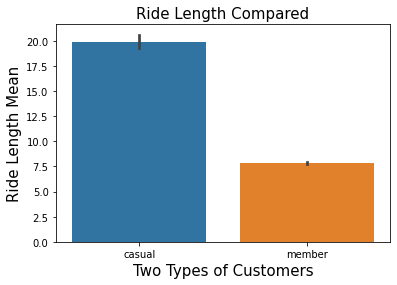

In [18]:
fig, ax = plt.subplots()

sns.barplot(data=result, x='member_casual', y='ride_length', ax=ax)

ax.set_title("Ride Length Compared", size=15)
plt.xlabel("Two Types of Customers", size=15)
plt.ylabel("Ride Length Mean", size=15)

plt.show()

We observe that,
* **Casual riders** ride our bikes much longer than annual members. we can assume that **casual riders** have a ride for tourism or leisure. But we need more information to check it out.

#### **2. Customer Type vs Day**

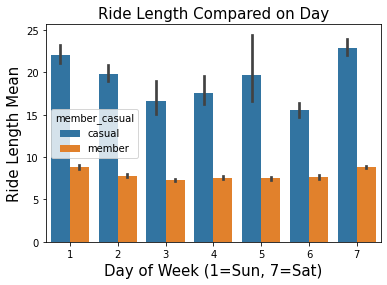

In [19]:
fig, ax = plt.subplots()

sns.barplot(data=result, x='day_of_week', y='ride_length', hue='member_casual', ax=ax)

ax.set_title("Ride Length Compared on Day", size=15)
plt.xlabel("Day of Week (1=Sun, 7=Sat)", size=15)
plt.ylabel("Ride Length Mean", size=15)

plt.show()

This shows us,
* **Casual riders** tend to use the bikes on the weekend more than on the week.
* The interesting point is, while annual members use the bikes constantly around 6~8 minutes without notable change all week, **casual riders** are on the opposit side. They use the bikes much longer, and there is a gap between on the week and on the weekend and also notable change on the week.

#### **3. Customer Type vs Bike Type**

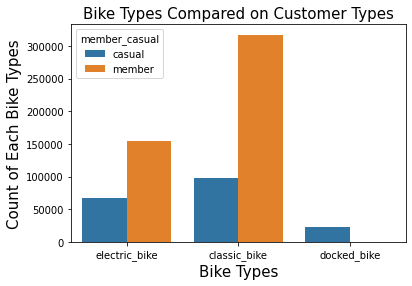

In [20]:
fig, ax = plt.subplots()

sns.countplot(data=result, x='rideable_type', hue='member_casual', ax=ax)

ax.set_title("Bike Types Compared on Customer Types", size=15)
plt.xlabel("Bike Types", size=15)
plt.ylabel("Count of Each Bike Types", size=15)

plt.show()

We observe that,
* It is very notable that annual members use classic bike much more than other bike types, while casual riders use all types of bike.
* It makes sense, since people tend to use docked bike, who have a leisure or torism in that city.

#### **4. Customer Type vs Station**

In [21]:
top5_start = result.groupby('start_station_name')['start_station_name'].count().sort_values(ascending=False).head(5)
top5_start

start_station_name
Streeter Dr & Grand Ave     7458
Kingsbury St & Kinzie St    6457
Clark St & Elm St           5403
Ellis Ave & 60th St         5179
University Ave & 57th St    5166
Name: start_station_name, dtype: int64

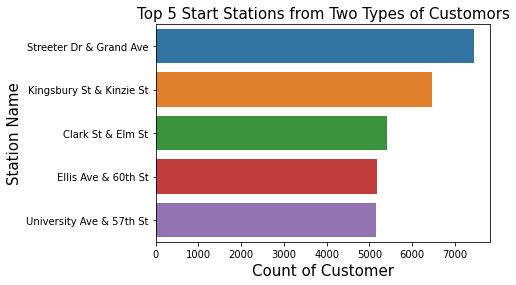

In [22]:
fig, ax = plt.subplots()

sns.barplot(data=result, y=top5_start.index, x=top5_start, ax=ax)

ax.set_title("Top 5 Start Stations from Two Types of Customors", size=15)
plt.xlabel("Count of Customer", size=15)
plt.ylabel("Station Name",size=15)

plt.show()

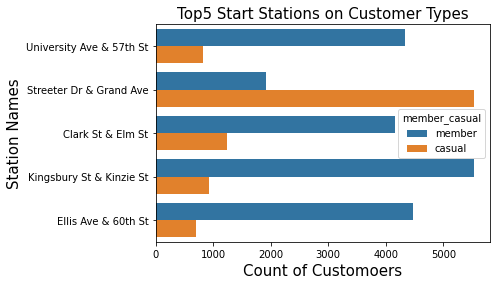

In [23]:
fig, ax = plt.subplots()

top5_start_stations = [
    "Streeter Dr & Grand Ave",
    "Kingsbury St & Kinzie St",
    "Clark St & Elm St",
    "Ellis Ave & 60th St",
    "University Ave & 57th St"
    ]

start_result = result[result['start_station_name'].isin(top5_start_stations)]

sns.countplot(data=start_result, y='start_station_name', hue='member_casual', ax=ax)

plt.title("Top5 Start Stations on Customer Types", size=15)
plt.xlabel("Count of Customoers", size=15)
plt.ylabel("Station Names", size=15)

plt.show()

It's very notable that,
* Only considering top 5 Stations, much more **annual members** start to ride at those stations than casual riders except Grand Ave, at where much more casual riders start to ride than **annual members.**
* It means that there is a difference in a count between two types of customers by stations.

Then we have a question,
* In which stations would most casual riders start to ride our bikes?

If we can ask this question, then we could improve our business model. For example we could consider to have more bikes or add addversting more around these stations.

In [24]:
casual = result[result['member_casual'] == 'casual']
casual.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59,2022-01-13 12:02,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01,-87.67,42.01,-87.67,casual,3.00,5
1,A6CF8980A652D272,electric_bike,2022-01-10 8:41,2022-01-10 8:46,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01,-87.67,42.01,-87.67,casual,4.00,2
3,CBB80ED419105406,classic_bike,2022-01-04 0:18,2022-01-04 0:33,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98,-87.67,41.96,-87.67,casual,15.00,3


In [25]:
annual = result[result['member_casual'] == 'member']
annual.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
2,BD0F91DFF741C66D,classic_bike,2022-01-25 4:53,2022-01-25 4:58,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.93,-87.65,41.93,-87.67,member,4.00,3
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 1:31,2022-01-20 1:37,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.88,-87.62,41.88,-87.63,member,1.00,5
5,A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48,2022-01-11 18:51,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.90,-87.67,41.90,-87.67,member,3.00,3


In [26]:
casual_list = casual['start_station_name'].value_counts().head(20)
casual_list

Streeter Dr & Grand Ave               5541
DuSable Lake Shore Dr & Monroe St     3362
Millennium Park                       2683
Shedd Aquarium                        2236
Michigan Ave & Oak St                 1788
DuSable Lake Shore Dr & North Blvd    1446
Theater on the Lake                   1406
Wells St & Concord Ln                 1369
Wells St & Elm St                     1336
Clark St & Armitage Ave               1301
Indiana Ave & Roosevelt Rd            1290
Dusable Harbor                        1282
Michigan Ave & Washington St          1246
Clark St & Elm St                     1238
Wabash Ave & Grand Ave                1196
Clark St & Lincoln Ave                1177
New St & Illinois St                  1095
Michigan Ave & 8th St                 1086
Adler Planetarium                     1083
Clark St & Newport St                 1052
Name: start_station_name, dtype: int64

In [27]:
annual_list = annual['start_station_name'].value_counts().head(20)
annual_list

Kingsbury St & Kinzie St         5537
Ellis Ave & 60th St              4476
Clinton St & Washington Blvd     4398
University Ave & 57th St         4338
Clinton St & Madison St          4210
Clark St & Elm St                4165
Wells St & Concord Ln            3591
Dearborn St & Erie St            3380
Wells St & Elm St                3334
Canal St & Adams St              3242
Wabash Ave & Grand Ave           3232
Clinton St & Jackson Blvd        3195
Wells St & Hubbard St            3189
Wells St & Huron St              3094
Loomis St & Lexington St         3025
St. Clair St & Erie St           3012
Desplaines St & Kinzie St        2956
Ellis Ave & 55th St              2894
Sheffield Ave & Fullerton Ave    2867
Dearborn St & Monroe St          2720
Name: start_station_name, dtype: int64

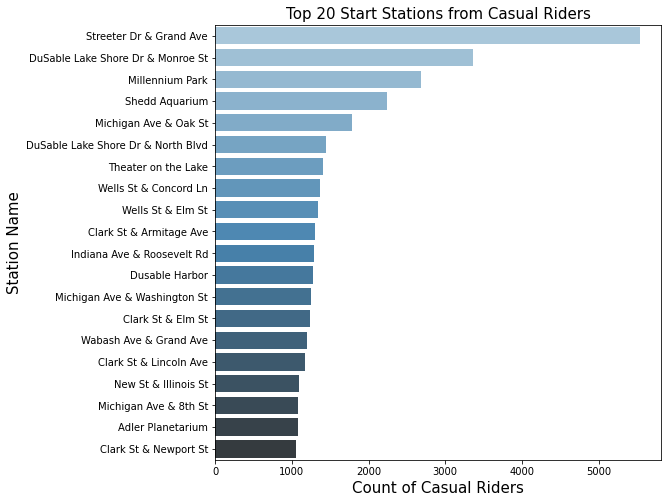

In [28]:
fig, ax = plt.subplots(figsize=(8,8))

sns.barplot(data=casual, y=casual_list.index, x=casual_list, palette='Blues_d',ax=ax)

ax.set_title('Top 20 Start Stations from Casual Riders', size=15)
plt.xlabel("Count of Casual Riders", size=15)
plt.ylabel("Station Name", size=15)

plt.show()

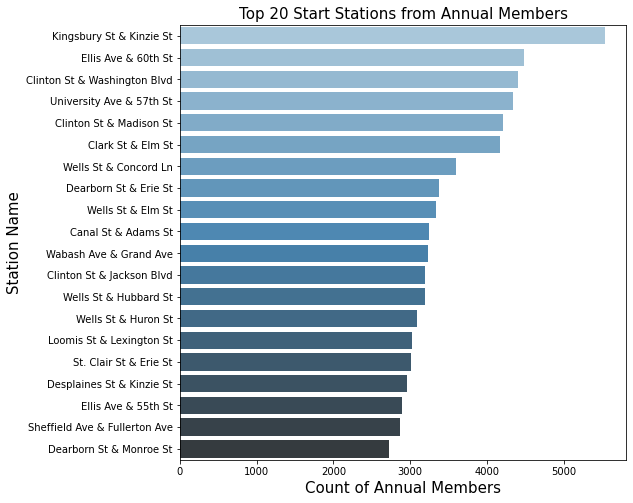

In [29]:
fig, ax = plt.subplots(figsize=(8,8))

sns.barplot(data=annual, y=annual_list.index, x=annual_list, palette='Blues_d',ax=ax)

ax.set_title('Top 20 Start Stations from Annual Members', size=15)
plt.xlabel("Count of Annual Members", size=15)
plt.ylabel("Station Name", size=15)

plt.show()

We observe that,
* There is a difference in stations, where customers start at, between casual riders and annual members.
* With this information, we could check the stations out, like where those are, in order to understand the behavior of customers.

Now let's explore end station.

In [30]:
top5_end = result.groupby('end_station_name')['end_station_name'].count().sort_values(ascending=False).head(5)
top5_end

end_station_name
Streeter Dr & Grand Ave     7590
Kingsbury St & Kinzie St    6121
University Ave & 57th St    5618
Clinton St & Madison St     5301
Clark St & Elm St           5254
Name: end_station_name, dtype: int64

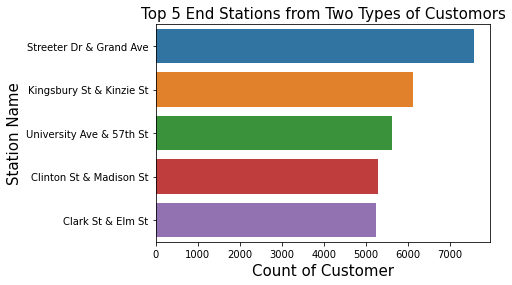

In [31]:
fig, ax = plt.subplots()

sns.barplot(data=result, y=top5_end.index, x=top5_end, ax=ax)

ax.set_title("Top 5 End Stations from Two Types of Customors", size=15)
plt.xlabel("Count of Customer", size=15)
plt.ylabel("Station Name",size=15)

plt.show()

In [32]:
top5_end_list = result['end_station_name'].value_counts().head(5)
top5_end_list

Streeter Dr & Grand Ave     7590
Kingsbury St & Kinzie St    6121
University Ave & 57th St    5618
Clinton St & Madison St     5301
Clark St & Elm St           5254
Name: end_station_name, dtype: int64

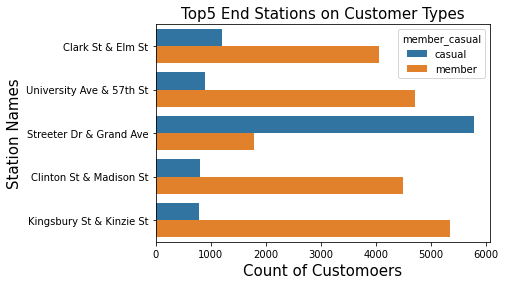

In [33]:
fig, ax = plt.subplots()

top5_end_stations = [
    "Streeter Dr & Grand Ave",
    "Kingsbury St & Kinzie St",
    "University Ave & 57th St",
    "Clinton St & Madison St",
    "Clark St & Elm St"
    ]

end_result = result[result['end_station_name'].isin(top5_end_stations)]

sns.countplot(data=end_result, y='end_station_name', hue='member_casual', ax=ax)

plt.title("Top5 End Stations on Customer Types", size=15)
plt.xlabel("Count of Customoers", size=15)
plt.ylabel("Station Names", size=15)

plt.show()

The station "Streeter Dr & Grand Ave" has the highst count of casual riders. It makes sense since this station has the highst count of casual riders, where they start to ride at. 

In [34]:
casual_endlist = casual['end_station_name'].value_counts().head(20)
casual_endlist

Streeter Dr & Grand Ave               5793
DuSable Lake Shore Dr & Monroe St     3134
Millennium Park                       2923
Shedd Aquarium                        2026
Michigan Ave & Oak St                 1973
DuSable Lake Shore Dr & North Blvd    1609
Theater on the Lake                   1489
Clark St & Armitage Ave               1378
Wells St & Concord Ln                 1370
Wabash Ave & Grand Ave                1318
Michigan Ave & Washington St          1311
Indiana Ave & Roosevelt Rd            1270
Dusable Harbor                        1205
Clark St & Elm St                     1202
Wells St & Elm St                     1198
Sheffield Ave & Waveland Ave          1164
Clark St & Lincoln Ave                1104
Michigan Ave & Lake St                1081
LaSalle St & Illinois St              1074
Dearborn St & Erie St                 1074
Name: end_station_name, dtype: int64

In [35]:
annual_endlist = annual['end_station_name'].value_counts().head(20)
annual_endlist

Kingsbury St & Kinzie St         5341
Clinton St & Washington Blvd     4728
University Ave & 57th St         4718
Clinton St & Madison St          4499
Ellis Ave & 60th St              4329
Clark St & Elm St                4052
Wells St & Concord Ln            3637
Dearborn St & Erie St            3487
Canal St & Adams St              3448
Wells St & Elm St                3283
Wells St & Hubbard St            3214
Wabash Ave & Grand Ave           3162
Wells St & Huron St              3114
Ellis Ave & 55th St              3106
St. Clair St & Erie St           3084
Green St & Madison St            2961
Sheffield Ave & Fullerton Ave    2910
Larrabee St & Kingsbury St       2823
Broadway & Barry Ave             2822
Loomis St & Lexington St         2799
Name: end_station_name, dtype: int64

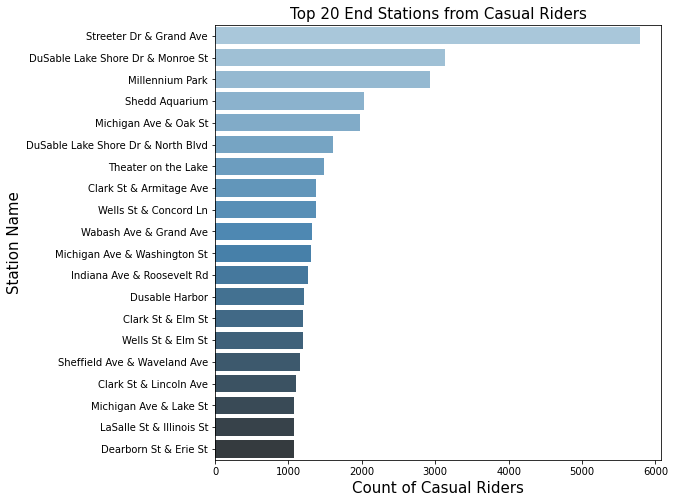

In [36]:
fig, ax = plt.subplots(figsize=(8,8))

sns.barplot(data=casual, y=casual_endlist.index, x=casual_endlist, palette='Blues_d',ax=ax)

ax.set_title('Top 20 End Stations from Casual Riders', size=15)
plt.xlabel("Count of Casual Riders", size=15)
plt.ylabel("Station Name", size=15)

plt.show()

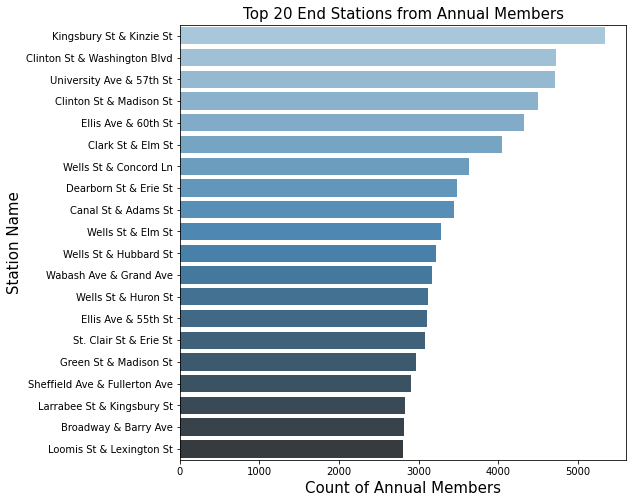

In [37]:
fig, ax = plt.subplots(figsize=(8,8))

sns.barplot(data=annual, y=annual_endlist.index, x=annual_endlist, palette='Blues_d',ax=ax)

ax.set_title('Top 20 End Stations from Annual Members', size=15)
plt.xlabel("Count of Annual Members", size=15)
plt.ylabel("Station Name", size=15)

plt.show()

We observer that,
* There is no huge difference in behaviour of casual riders between where they start to and where they end to ride.
* But on the other hand, there is a difference between where the annual members start to and end to ride at.


## **STEP 5: Share**
#### **1. Share my conclusion**
* **Casual riders**
    * use the bikes around 18~20 minutes
    * use the bikes more on the weekend
    * use all kind of bikes but mostly electic and classic
    * how they use the bikes are not constant on the week
    
Casual riders use the bikes mostly on the weekend for a leisure and tourism on the weekend.

<br>

* **Annual members**
    * use the bikes around 7~8 minutes
    * use the bikes a little bit more on the weekend, but there is no huge gap between the week and the weekend
    * use only classic bikes and electic but mostly classic bikes
    * how they use the bikes are very constant espacially on the week
    
Annual members use the bikes the whole week constant, espacially on the week for commute or pragmatic.
    
<br>

**So, what would motivate the casual riders to buy a annual membership?**
We could foucs on the side of leisure or tourism and provide many kind of ride options on the weekend espacially by electic and classic bikes, so that it can be interesting for the casual riders to have a annual membership. And it would be also a good idea to consider the aspect of that the casual riders tend to ride longer than annumal members.


    